<a href="https://colab.research.google.com/github/Himanshi143/Machine-Learning-By-Campusx/blob/main/Day-13/Toy_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Data Gathering + Data Preprocessing

In [ ]:
df=pd.read_csv('/content/placement.csv',index_col=0)
df.sample(5)

,cgpa,iq,placement
21,7.1,151.0,1
56,6.1,65.0,0
98,6.3,103.0,1
87,5.7,132.0,1
72,7.3,116.0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 3.1 KB


In [ ]:
df.describe()

,cgpa,iq,placement
count,100.000000,100.000000,100.000000
mean,5.991000,123.580000,0.500000
std,1.143634,39.944198,0.502519
min,3.300000,37.000000,0.000000
25%,5.075000,101.500000,0.000000
50%,6.000000,127.500000,0.500000
75%,6.900000,149.000000,1.000000
max,8.500000,233.000000,1.000000


EDA

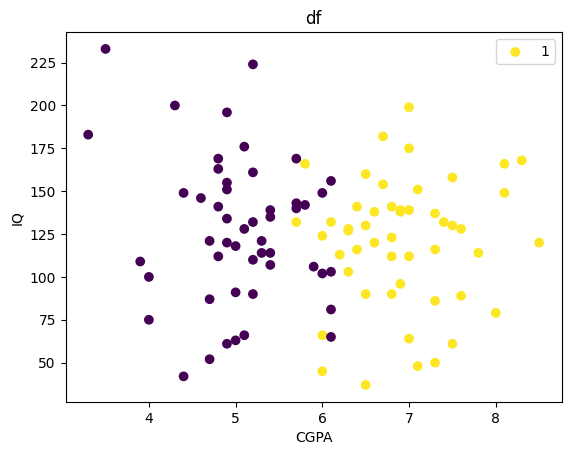

In [ ]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])
plt.xlabel("CGPA")
plt.ylabel("IQ")
plt.title("df")
plt.legend(df['placement'])

In [ ]:
x=df.iloc[:,:2]
y=df.iloc[:,-1]

Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(80, 2)
(80,)
(20, 2)
(20,)


Scaling Values

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

Train the Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf=LogisticRegression()
clf.fit(x_train_sc,y_train)

LogisticRegression()

Testing

In [ ]:
y_pred=clf.predict(x_test_sc)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)*100

85.0

In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

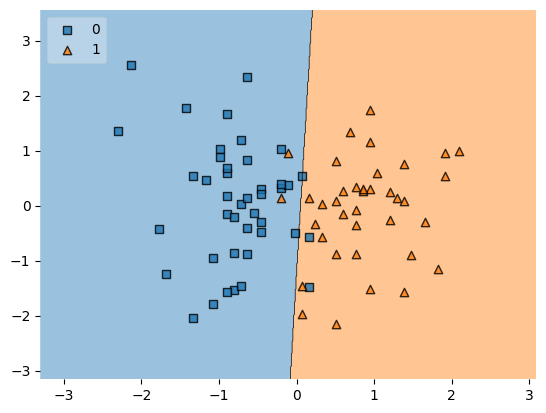

In [ ]:
plot_decision_regions(x_train_sc, y_train.values, clf=clf, legend=2)

Deployement

In [ ]:
import pickle

In [ ]:
pickle.dump(clf,open('/content/model','wb'))